In [30]:
import numpy as np
import matplotlib.pyplot as plt
from myotc.utils import *

# Helper function to generate point cloud
def get_pointcloud(mean_sigma, block_size, n_blocks, dim):
    point_sigma = 1
    means = np.random.normal(0, mean_sigma, (n_blocks, dim))
    points = np.zeros((block_size * n_blocks, dim))
    for c in range(n_blocks):
        for dim_idx in range(dim):
            points[c * block_size: (c + 1) * block_size, dim_idx] = np.random.normal(means[c, dim_idx], point_sigma, block_size)
    return points, means

# Params
# block_size = 5;
# n_blocks = 2;
# n = block_size*n_blocks;
# dim = 2;
block_size = 2;
n_blocks = 2;
n = block_size*n_blocks;
dim = 2;

mean_sigma = 5  # Example value

# Generate point clouds V1 and V2
V1, V2 = get_pointcloud(mean_sigma, block_size, n_blocks, dim)



# Generate random matrix A2
A2 = np.random.randint(1, 11, (n_blocks, n_blocks))

# Generate matrix A1
A1 = np.zeros((n, n))
for i in range(n_blocks):
    for j in range(n_blocks):
        for k in range(block_size):
            rv = np.random.rand(block_size)
            rv = rv * A2[i, j] / np.sum(rv) / block_size
            A1[i * block_size + k, j * block_size: (j + 1) * block_size] = rv

# print(A1.shape, A2.shape, V1.shape, V2.shape)

# V1 = np.array([
# [1.4786,-0.2885],
# [-0.8243,-1.7479],
# [-0.5537,-0.1875],
# [-0.4139,-0.5610],
# [0.1822,-0.1728],
# [-0.7730,-0.5754],
# [-0.6185, 0.3518],
# [-0.4191,-0.7918],
# [-0.4780,-0.1640],
# [-1.6767,-0.6409],
# ])

# V2 = np.array([
# [0.2192,-0.8808],
# [-0.4677,-0.2467]
# ])
# A1 = np.array([
#     [0.3732, 0.2756, 0.1131, 0.2063, 0.0318, 0.3099, 0.1997, 0.3172, 0.1452, 0.4280],
#     [0.0380, 0.3102, 0.2640, 0.3277, 0.0602, 0.2431, 0.3631, 0.2348, 0.2918, 0.2672],
#     [0.2087, 0.1455, 0.2907, 0.1457, 0.2094, 0.4533, 0.3134, 0.5515, 0.0531, 0.0287],
#     [0.5610, 0.1954, 0.0877, 0.0836, 0.0723, 0.0174, 0.2860, 0.2580, 0.3980, 0.4406],
#     [0.1354, 0.2900, 0.1278, 0.1819, 0.2650, 0.6785, 0.5636, 0.0525, 0.0055, 0.0999],
#     [0.0898, 0.0852, 0.1621, 0.1234, 0.1396, 0.1554, 0.1405, 0.0924, 0.1292, 0.0825],
#     [0.0245, 0.0141, 0.0405, 0.2885, 0.2324, 0.1785, 0.1503, 0.0545, 0.0357, 0.1811],
#     [0.0221, 0.1822, 0.1985, 0.0923, 0.1049, 0.0715, 0.1978, 0.1074, 0.1214, 0.1019],
#     [0.2546, 0.0795, 0.0283, 0.1815, 0.0561, 0.2094, 0.1357, 0.0052, 0.2314, 0.0184],
#     [0.1280, 0.0451, 0.3293, 0.0773, 0.0203, 0.1448, 0.3196, 0.0410, 0.0077, 0.0869]
# ])
# A2 = np.array([
#     [5, 7],
#     [3, 3]
# ])
# print(V1.shape, V2.shape)
# print(A1.shape, A2.shape)

P1 = A1 / np.sum(A1, axis=1)[:, np.newaxis]
P2 = A2 / np.sum(A2, axis=1)[:, np.newaxis]

# stat_dist1 = approx_stat_dist(P1, 100)
# stat_dist2 = approx_stat_dist(P2, 100)
# stat_dist3 = np.ones((n, 1)) / n
# stat_dist4 = np.ones((n_blocks, 1)) / n_blocks

# print(stat_dist3.shape, stat_dist4.shape)
c = np.zeros((n, n_blocks)) # checked

for i in range(n):
    for j in range(n_blocks):
        c[i, j] = np.sum((V1[i, :] - V2[j, :]) ** 2)

cost, otc_edge_alignment, otc_alignment = exact_otc(P1, P2, c)
print(f"cost: {cost}")
otc_alignment[np.where(otc_alignment < 1e-4)] = 0

print(otc_alignment.shape)
aligned_mass_otc = eval_alignment(otc_alignment, block_size, n_blocks)
# aligned_mass_fgw = eval_alignment(fgw_alignment, block_size, n_blocks)
# aligned_mass_otsd = eval_alignment(otsd_alignment, block_size, n_blocks)
# print(aligned_mass_otc)
# 初始化 values，假设它是一个空列表
values = []

# 存储结果
values.append(['OTC', aligned_mass_otc])
# values.append(['FGW', aligned_mass_fgw])
# values.append(['OT-SD', aligned_mass_otsd])

for value in values:
    print(value)

cost: 0.9449806367385342
(4, 2)
['OTC', 1.0]


d:\Code\NetOTC\myotc\utils.py:57: OptimizeWarning: Unrecognized options detected: {'tol': 1e-09, 'method': 'interior-point'}. These will be passed to HiGHS verbatim.
  res = linprog(cost, A_eq=A_eq, b_eq=b_eq, bounds=[(0, None) for _ in range(nx * ny)], options=options)
d:\Code\NetOTC\myotc\utils.py:169: OptimizeWarning: Unrecognized options detected: {'tol': 1e-06}. These will be passed to HiGHS verbatim.
  res = linprog(c, A_eq=Aeq, b_eq=beq, bounds=[(0, None) for _ in range(n)], options=options)


In [31]:
from matplotlib.colors import CSS4_COLORS
import random

all_color = list(CSS4_COLORS.keys())
all_color.remove('white')

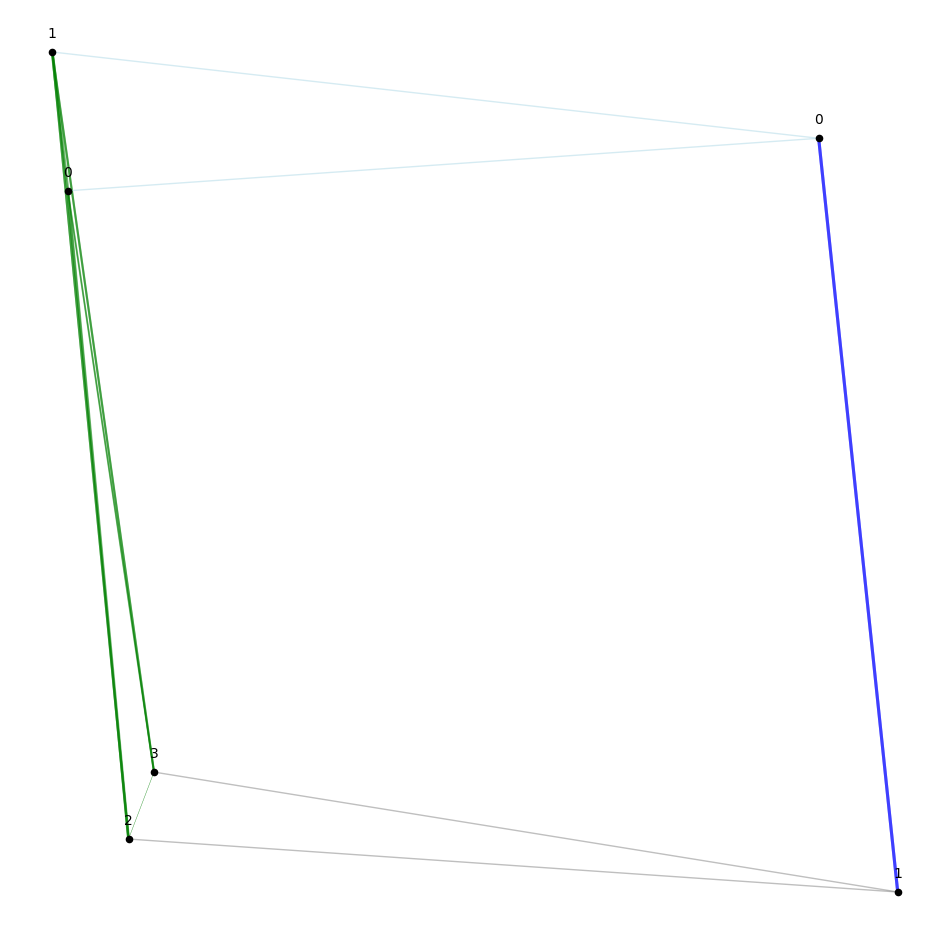

In [32]:
# Function to plot a graph using its adjacency matrix and vertex coordinates
def plot_graph(A, V, ax, color, title):
    # Plot edges
    scale_A = 4*((A - np.min(A)) / np.max(A))
    for i in range(A.shape[0]):
        for j in range(A.shape[1]):
            weight = scale_A[i, j]
            if weight > 0:
                ax.plot([V[i, 0], V[j, 0]], [V[i, 1], V[j, 1]], color=color, lw=weight, alpha=0.5)
    
    # Plot vertices
    ax.scatter(V[:, 0], V[:, 1], c='black', s=20, zorder=5)
    
    # Annotate vertices
    for i, txt in enumerate(range(V.shape[0])):
        ax.annotate(txt, (V[i, 0], V[i, 1]), textcoords="offset points", xytext=(0, 10), ha='center')
    
    ax.set_title(title)

# Create a plot
# fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# # Plot the two graphs
# plot_graph(A1, V1, ax[0], 'Graph 1')
# plot_graph(A2, V2, ax[1], 'Graph 2')

# plt.show()

# Function to plot graph alignment using otc_alignment matrix
def plot_graph_alignment(A1, V1, A2, V2, otc_alignment, ax):
    # Plot the original graphs first
    
    graph_drift = [np.max(np.max(V1, axis=0))*2, 0]
    
    plot_graph(A1, V1, ax, 'green', 'Graph 1 and Graph 2 with Edge Alignment')
    plot_graph(A2, V2 + graph_drift, ax, 'blue', '')  # Offset the second graph for better visualization
    
    # Find non-zero entries in the otc_alignment matrix
    alignment_indices = np.argwhere(otc_alignment > 0.)
    color_choice = random.sample(all_color, V2.shape[0])
        
    # Draw alignment edges
    for i, j in alignment_indices:
        # Determine the corresponding vertices in V1 and V2
        v1_idx = i % A1.shape[0]
        v2_idx = j % A2.shape[0]

        # Draw an edge between the corresponding vertices in V1 and V2
        v1_coord = V1[v1_idx, :]
        v2_coord = V2[v2_idx, :] + graph_drift  # Offset the second graph's coordinates
        ax.plot([v1_coord[0], v2_coord[0]], [v1_coord[1], v2_coord[1]], color=color_choice[v2_idx], lw=1, alpha=0.5)
    # ax.set_aspect('equal')
    ax.axis('off')

# Create a new plot
fig, ax = plt.subplots(figsize=(12, 12))

# Plot the graph alignment
plot_graph_alignment(A1, V1, A2, V2, otc_alignment, ax)

plt.show()


In [33]:
c

array([[  0.64930991,  70.77087653],
       [  1.02270142, 102.02387161],
       [ 72.74317726,   0.38524074],
       [ 64.66800146,   2.5087666 ]])

# learn

In [34]:
P = get_ind_tc(P1, P2)

print(f"shape of \n P1: {P1.shape}\n P2: {P2.shape}\n P : {P.shape}")

shape of 
 P1: (4, 4)
 P2: (2, 2)
 P : (8, 8)


In [38]:
A2

array([[9, 6],
       [6, 1]])

In [40]:
print(f"sum of P1: {np.sum(P1, axis=1)}")
print(f"sum of P2: {np.sum(P2, axis=1)}")
print(f"sum of P : {np.sum(P, axis=1)}")

print('='*20 + 'P1' + '='*20)
print(P1)

print('='*20 + 'P2' + '='*20)
print(P2)

print('='*20 + 'P=' + '='*20)
print(P)



sum of P1: [1. 1. 1. 1.]
sum of P2: [1. 1.]
sum of P : [1. 1. 1. 1. 1. 1. 1. 1.]
====================P1====================
[[0.4906061  0.1093939  0.27562264 0.12437736]
 [0.29322885 0.30677115 0.21862317 0.18137683]
 [0.39298113 0.46416173 0.02829686 0.11456028]
 [0.39716492 0.45997794 0.08030574 0.0625514 ]]
====================P2====================
[[0.6        0.4       ]
 [0.85714286 0.14285714]]
====================P=====================
[[0.29436366 0.19624244 0.06563634 0.04375756 0.16537359 0.11024906
  0.07462641 0.04975094]
 [0.42051952 0.07008659 0.0937662  0.0156277  0.23624798 0.03937466
  0.10660916 0.01776819]
 [0.17593731 0.11729154 0.18406269 0.12270846 0.1311739  0.08744927
  0.1088261  0.07255073]
 [0.25133901 0.04188984 0.2629467  0.04382445 0.18739129 0.03123188
  0.15546585 0.02591098]
 [0.23578868 0.15719245 0.27849704 0.18566469 0.01697812 0.01131874
  0.06873617 0.04582411]
 [0.33684097 0.05614016 0.39785291 0.06630882 0.02425445 0.00404241
  0.09819453 0.01

In [42]:
def exact_otc(Px, Py, c):
    dx = Px.shape[0]
    dy = Py.shape[0]
    
    P_old = np.ones((dx * dy, dx * dy))
    P = get_ind_tc(Px, Py) # checked
    # print(f'P: {P}')
    iter_ctr = 0
    while np.max(np.abs(P - P_old)) > 1e-10:
        iter_ctr += 1
        P_old = P
        g, h = exact_tce(P, c)
        print(g.shape, h.shape)
        print(g, h)
        # The following line is a placeholder. The function exact_tci needs to be implemented.
        P = exact_tci(g, h, P_old, Px, Py) # checked
        # Check for convergence (placeholder)
        if np.all(P == P_old):
            # P, c Checked
            stat_dist, exp_cost = get_best_stat_dist(P, c)
            
            return exp_cost, P, stat_dist.reshape((dy, dx), order='F').T # 使用列优先（column-major）顺序 reshape
exact_otc(P1, P2, c)

(8,) (8,)
[33.66354477 33.66354477 33.66354477 33.66354477 33.66354477 33.66354477
 33.66354477 33.66354477] [-32.21166141  35.36295496 -29.13919586  67.67882393  42.04765684
 -45.77399596  34.10791568 -43.34490469]
(8,) (8,)
[0.94498064 0.94498064 0.94498064 0.94498064 0.94498064 0.94498064
 0.94498064 0.94498064] [ -0.41340988  93.23848858   0.19498244 124.14516391  95.97233371
  -0.46751956  87.78975616   1.54860456]


d:\Code\NetOTC\myotc\utils.py:57: OptimizeWarning: Unrecognized options detected: {'tol': 1e-09, 'method': 'interior-point'}. These will be passed to HiGHS verbatim.
  res = linprog(cost, A_eq=A_eq, b_eq=b_eq, bounds=[(0, None) for _ in range(nx * ny)], options=options)
d:\Code\NetOTC\myotc\utils.py:169: OptimizeWarning: Unrecognized options detected: {'tol': 1e-06}. These will be passed to HiGHS verbatim.
  res = linprog(c, A_eq=Aeq, b_eq=beq, bounds=[(0, None) for _ in range(n)], options=options)


(0.9449806367385342,
 array([[0.4906061 , 0.        , 0.1093939 , 0.        , 0.        ,
         0.27562264, 0.        , 0.12437736],
        [0.4906061 , 0.        , 0.1093939 , 0.        , 0.1327655 ,
         0.14285714, 0.12437736, 0.        ],
        [0.29322885, 0.        , 0.30677115, 0.        , 0.        ,
         0.21862317, 0.        , 0.18137683],
        [0.29322885, 0.        , 0.30677115, 0.        , 0.07576603,
         0.14285714, 0.18137683, 0.        ],
        [0.13583827, 0.25714286, 0.46416173, 0.        , 0.        ,
         0.02829686, 0.        , 0.11456028],
        [0.39298113, 0.        , 0.46416173, 0.        , 0.        ,
         0.02829686, 0.        , 0.11456028],
        [0.14002206, 0.25714286, 0.45997794, 0.        , 0.        ,
         0.08030574, 0.        , 0.0625514 ],
        [0.39716492, 0.        , 0.45997794, 0.        , 0.        ,
         0.08030574, 0.        , 0.0625514 ]]),
 array([[0.40556171, 0.        ],
        [0.27625647, 0.